# Data  with Pandas

1. Load the cleaned data. 

2. Remove the column 'last_pymnt_amnt'.

3. Add a column 'yearly_loan_amnt' showing the YEARLY loan amount for each loan. (Hint: think of what 'term' is)

4. Add a column 'yearly_interest_payable' showing the amount of interest payable at the end of each year. (Hint: int_rate is the yearly interest rate)

5. Add a column 'total_payable' which is the total loan amount plus all the yearly interests the borrower has to pay over the loan term.

6. Bonus question: What amount did the borrowers in each grade paid to Lendmark - including interests? (Assume that defaulted loans did not pay anything).

In [16]:
##
# Load data. No changes needed.
##
import pandas as pd
data = pd.read_pickle('Lendmark_clean.pkl')

** Your solution below: **

In [17]:
# 2.Remove the column 'last_pymnt_amnt'
data = data.drop(['last_pymnt_amnt'], axis=1)
# 3. Add a column 'yearly_loan_amnt' showing the YEARLY loan amount for each loan
data['yearly_loan_amnt'] = data.loan_amnt/(data.term/12)
# 4. Add a column 'yearly_interest_payable' showing the amount of interest payable at the end of each year.
data['yearly_interest_payable'] = data.loan_amnt*data.int_rate*0.01
# 5. Add a column 'total_payable' which is the total loan amount plus all the yearly interests the borrower has to pay over the loan term.
data['total_payable']=data.loan_amnt+data.yearly_interest_payable*(data.term/12)


In [18]:
#6. Bonus question: What amount did the borrowers in each grade paid to Lendmark - including interests? (Assume that defaulted loans did not pay anything).
data[data.defaulted==0].groupby(by='grade').agg('sum').total_payable

grade
1    1.009690e+08
2    1.650868e+08
3    1.125028e+08
4    8.344786e+07
5    6.101872e+07
6    2.534664e+07
7    9.215791e+06
Name: total_payable, dtype: float64

# Loan default prediction

There is a dataset with the following target distribution:
* Target value 0: 5% of the cases
* Target value 1: 95% of the cases


1. Create a confusion matrix by hand for a model that predicts value 0 for every observation.
2. What would be the accuracy of the above model?
3. Explain the difference between the following performance metrics: Accuracy, Area under ROC curve (AUC)

** Your answers below: **

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import numpy as np


y_true = np.ones(100).tolist()

for i in range(5):
    y_true[i] = 0

y_pred = np.zeros(100).tolist()

cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:")
print(cm)
acc = accuracy_score(y_true, y_pred)
print("Accuracy:")
print(acc)
print("Accuracy: ACC = TP + TN / (P + N)")
print("ROC: The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings")

Confusion matrix:
[[ 5  0]
 [95  0]]
Accuracy:
0.05
Accuracy: ACC = TP + TN / (P + N)
ROC: The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings


# Binomial tree

Construct a 2-step binomial tree model in which the underlying is an interest rate, $\ r\ (t)\ $. The three layers of the binomial tree are numbered: $\ i=0\ $ indicates the initial node, $\ i=1\ $ are the two nodes after the first time step, and $\ i=2\ $ are the three nodes after the second time step. At $\ t=0\ $ the interest rate is $\ r_{0} = 3\%\ $. When we step forward in time, the interest rate can change to either $\ u=1.25\ $ times its previous value or $\ d=0.8\ $ times its previous value. For both steps the 1-year risk-free rate is $\ R=3\%\ $. At time $\ 0\ $ what is the fair value of a zero coupon bond (ZCB) that has a notional of $\ N=\$100\ $ and a maturity of $\ T=2\ $ ? In other words, what is the present value of $\ \$100\ $  that we receive after the second step ?

## Suggested steps
1. Based on $\ r_{0}\ $, $\ u\ $ and $\ d\ $: calculate the interest rate values at all three end points of the tree.
2. Based on $\ r_{0}\ $, $\ u\ $, $\ d\ $ and $\ R\ $: calculate $\ p\ $, the probability of stepping up.
3. Place $\ \$100\ $ at each of the three end points.
4. The probability of arriving at the three end points (from top to bottom) is $\ p^{\ 2}\ $, $\ 2\ p\ (1-p)\ $ and $\ (1-p)^{\ 2}\ $.
5. Discount values back to the original node.

In [6]:
### --- Insert your code at "WRITE YOUR CODE HERE" ---

# importing libraries
import numpy as np

# 'BDT' stands for Black-Derman-Toy, the name of the related model
def ZCB_BDT_2(r0,R,u,d,N):
    # pricing a zero coupon bond (ZCB) with a two-step binomial tree (Black-Derman-Toy model)
    
    r0 = float(r0) # initial rate
    R = float(R) # risk-free rate, for example, 1% is R=0.01
    u = float(u) # ratio for stepping up
    d = float(d) # ratio for stepping down
    N = float(N) # notional
    
    # --- WRITE YOUR CODE HERE: interest rate values at the two nodes after the first step ---
    r_1_top = r0 * u # top node
    r_1_bot = r0 * d # bottom node
    
    # --- WRITE YOUR CODE HERE: interest rate values at the three nodes after the second step ---
    r_2_top = r0 * u * u # top node
    r_2_mid = r0 * u * d # middle node
    r_2_bot = r0 * d * d # bottom node
    
    # --- WRITE YOUR CODE HERE: calculate p ---
    p = (np.exp(R)-d)/(u-d) # NOTE: this is the p of a single step
    
    # --- WRITE YOUR CODE HERE: probability of arriving at the two nodes after the first step ---
    p_1_top = p     # top node
    p_1_bot = 1 - p # bottom node
    
    # --- WRITE YOUR CODE HERE: fair value at each of the three final nodes ---
    f_2_top = N # top node
    f_2_mid = N # middle node
    f_2_bot = N # bottom node
    
    # --- WRITE YOUR CODE HERE: probability of arriving at each of the final nodes ---
    # NOTE that these quantities are not used for computing the final result
    # p_2_top = ... # top node
    # p_2_mid = ... # middle node
    # p_2_bot = ... # bottom node

    # --- WRITE YOUR CODE HERE: from the 3rd layer discount to the 2nd layer ---
    f_1_top = ( p * f_2_top + (1-p) * f_2_mid ) / ( 1 + r_1_top )
    f_1_bot = ( p * f_2_mid + (1-p) * f_2_bot ) / ( 1 + r_1_bot )

    # --- WRITE YOUR CODE HERE: from the 2nd layer discount to the 1st layer ---
    f = ( p * f_1_top + (1-p) * f_1_bot ) / (1 + R)
    
    # final value: fair value of the $100 received at time t=2
    return f

# Print your solution
ZCB_BDT_2(0.03,0.03,1.25,0.8,100)

94.180090871501264

# American call option pricing

Construct a 2-step binomial tree model for an American call option on a single share of Microsoft stock. Assume that the spot price is $\ S_{\ 0}=\$100\ $. Both steps correspond to a time length of 1 year. The call option matures after the second time step and the strike price is $\ K=\$99\ $. When we step forward in time along the tree, the price of the underlying can change to either $\ u=1.05\ $ times its previous value or $\ d=1/u\ $ times its previous value. Assume that the risk-free rate is constant $\ R=2\%\ $.

What is the fair value of this option ?

## Suggested steps
Calculate 
1. the value of the underlying at each node of the first ($i=1$) layer and the second ($i=2$) layer,
2. the parameter $\ p\ $ (probability of moving up) of the binomial tree model,
3. the value of the call option at each node of the 2nd layer,
4. the value of the call option at each node of the 1st layer,
5. the value of the call option at the starting node (the node of the 0th layer).

Note that the definition of the American call option implies that in this model the option can be excerised not only at the nodes of the 2nd layer (at maturity), but at each node inside the tree. Decide at each node whether to keep the option or to excerise it only by calculating which decision gives a higher value.

In [8]:
### --- Insert your code at "WRITE YOUR CODE HERE" ---

# importing libraries
import numpy as np

def AmCall(S0,R,u,K):
    # pricing an ATM American call option on an underlying stock
    
    # --- WRITE YOUR CODE HERE: convert all four intput parameters from string to float ---
    S0 = float(S0) # initial spot rate
    R = float(R)   # risk-free rate, for example, 1% is R=0.01
    u = float(u)   # ratio for stepping up
    d = float(1/u) # ratio for stepping down
    N = 1.0        # notional
    T = 1.0        # time length of single step along the tree
    K = float(K)   # strike price
    
    # --- WRITE YOUR CODE HERE: value of the underlying at the two nodes after the first step ---
    S_1_top = S0 * u # top node
    S_1_bot = S0 * d # bottom node
    
    # --- WRITE YOUR CODE HERE: value of the underlying at the three nodes after the second step ---
    S_2_top = S0 * u * u # top node
    S_2_mid = S0 * u * d # middle node
    S_2_bot = S0 * d * d # bottom node
    
    # --- WRITE YOUR CODE HERE: p (probability of stepping up) ---
    # NOTE that this is the probability for a single step that has length T
    p = (np.exp(R*T) - d ) / ( u - d ) 
    
    # --- WRITE YOUR CODE HERE: probability of arriving at the two nodes after the first step ---
    p_1_top = p     # top node
    p_1_bot = 1 - p # bottom node

    # --- WRITE YOUR CODE HERE: probability of arriving at each of the final nodes ---
    # NOTE that these quantities are not used for computing the final result
    # p_2_top = ... # top node
    # p_2_mid = ... # middle node
    # p_2_bot = ... # bottom node
    
    # --- WRITE YOUR CODE HERE: value of the American call option at the three final nodes in layer i=2 ---
    f_2_top = np.maximum( 0.0, S_2_top - K ) # top node
    f_2_mid = np.maximum( 0.0, S_2_mid - K ) # middle node
    f_2_bot = np.maximum( 0.0, S_2_bot - K ) # bottom node
    
    # --- WRITE YOUR CODE HERE: value of the call option: from the i=2 layer calculate the i=1 layer ---
    # --- maximum of the following two values: (1) excercising (2) discounted from the i=2 layer ---
    f_1_top = np.maximum( S_1_top - K, ( p * f_2_top + (1-p) * f_2_mid ) / ( 1 + R ) )
    f_1_bot = np.maximum( S_1_bot - K, ( (1-p) * f_2_bot + p * f_2_mid ) / ( 1 + R ) )

    # --- WRITE YOUR CODE HERE: American ATM call option: from the i=1 layer discount to the i=0 layer ---
    # --- maximum of these two: (1) immediately excercising the option (2) discounting from the i=1 layer ---
    f = np.maximum(S0 - K, ( p * f_1_top + (1-p) * f_1_bot ) / (1 + R))
    
    # final value: fair value of the $100 received at time t=2
    return f

# Print your solution
AmCall(100,0.02,1.05,99)

5.6268739343858911

# Monte Carlo

## 1.
When pricing an option, how can we decide whether to use the Black-Scholes formula, or a Monte-Carlo simulation? (Please answer with text.)

If an analytic formula is available for the given derivative, and computationally feasible, usually Black-Scholes is a better choice. If there is no closed form solution, or it wouldn't be efficient, Monte-Carlo is always an option.

## 2.

Consider the EUR/HUF currency pair, assume its process is driven by the following stochastic differential equation:
$$S(t+\Delta t) - S(t) = \mu S(t) \Delta t + \sigma S(t) \epsilon \sqrt{\Delta t} ,$$
where $\epsilon$ is a random sample from a standard normal distribution. Assume that:
- $S(0) = 320$;
- $\mu = 0.02$;
- $\sigma = 0.05$.

a) Use Monte Carlo simulation to estimate the probability of the Euro price being cheaper than 310 HUF anytime in the following year (52 weeks).

I.e. $P(S(t) < 310, 0 < t \leq T) = ?$ if $T=1$.

b) What is the 95% confidence interval of this estimation?

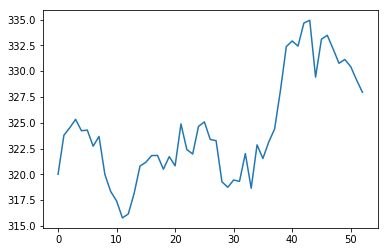

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt, ceil

def get_path(S0, T, M, mu, sigma):
    S = [None] * (M+1)
    S[0] = S0    
    dt = 1.0*T/M
    for t in range(M):
        S[t+1] = S[t]+mu*S[t]*dt+sigma*S[t]*np.random.normal()*sqrt(dt)
    return S

S = get_path(320, 1, 52, 0.02, 0.05)
plt.plot(S)

In [3]:
N = 10000

p = 0
p_vec = np.array([0] * N)
for k in range(N):
    S = get_path(320, 1, 52, 0.02, 0.05)
    if min(S) < 310:
        p += 1
        p_vec[k] = 1
p/N

0.3544

In [4]:
def calc_stats(values):
    N = len(values)
    numbers = np.arange(1, N+1)
    sqrt_numbers = np.sqrt(numbers)

    mean = np.cumsum(values) / numbers
    std = np.zeros(N)
    for n in range(N):
        std[n] = np.std(values[:n+1])
    lower = mean - 1.96 * std / sqrt_numbers
    upper = mean + 1.96 * std / sqrt_numbers

    return mean, std, lower, upper

mean, std, lower, upper = calc_stats(p_vec)
print('For %d steps: %.2f < P < %.2f with 95%% confidence.' % (N, lower[N-1], upper[N-1]))

For 10000 steps: 0.35 < P < 0.36 with 95% confidence.


# Trade compression

## 1.

When doing trade compression with linear programming, why is it better to minimize the notional instead of the number of trades? (Please answer with text.)

Minimizing the number of trades is computationally expensive (NP-comlete). Minimizing the notional is faster and proves to be a good proxy at the same time.

## 2.

Imagine you are the manager of a Scandinavian furniture factory, where the furnitures are delivered as a package of standardized parts and pieces. Let's consider you can make the followings from your inventory:

* TV stand: 2 screws and 5 furniture panels are needed, \$40 profit per piece
* Coffee table: 6 screws and 4 furniture panels are needed, \$55 profit per piece

The current inventory consists of 150 screws and 155 furniture panels.

How many TV stands and coffee tables should you package to maximize profits?

In [5]:
from scipy.optimize import linprog

c = [-40, -55] # profit, negated as linprog minimizes by default
A_ub = [[2, 6], [5, 4]]
b_ub = [150, 155]

solution = linprog(c, A_ub=A_ub, b_ub=b_ub)

print("Number of TV stands: %d" % round(solution.x[0]))
print("Number of coffee tables: %d" % round(solution.x[1]))
print("Maximum profit: $%.2f" % -solution.fun)

Number of TV stands: 15
Number of coffee tables: 20
Maximum profit: $1700.00
